In [48]:
import torch
from torch import nn

from torchvision import datasets
import torchvision.transforms as transforms

from torch.utils.data import DataLoader

import matplotlib.pyplot as plt

import utils

import numpy as np
from tqdm import tqdm

In [2]:
# Load dataset
transformation = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))
    ])

train = datasets.CIFAR10(
    root="data",
    train=True,
    download=True,
    transform=transformation,
    target_transform=None
)

test = datasets.CIFAR10(
    root="data",
    train=False,
    download=True,
    transform=transformation,
)

Files already downloaded and verified
Files already downloaded and verified


In [3]:
classes = [
    "airplane",					
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image 0 shape: torch.Size([32, 32, 3])


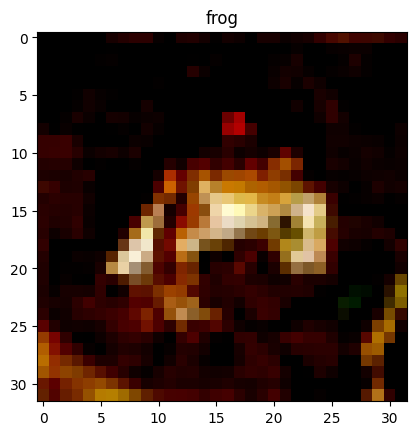

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image 1 shape: torch.Size([32, 32, 3])


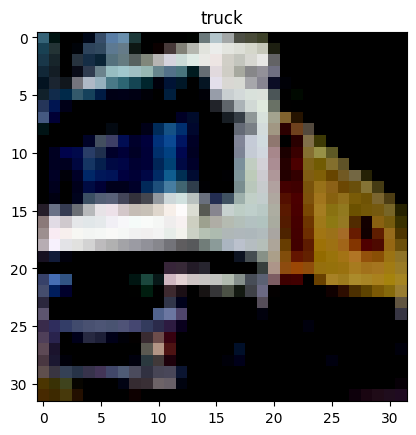

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image 2 shape: torch.Size([32, 32, 3])


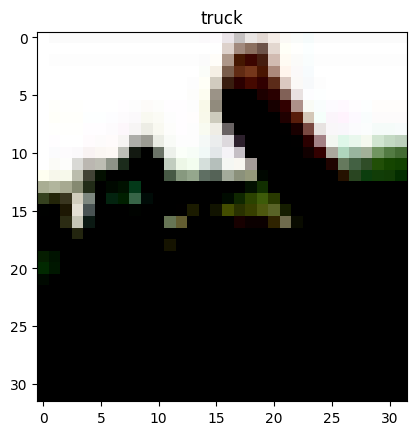

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image 3 shape: torch.Size([32, 32, 3])


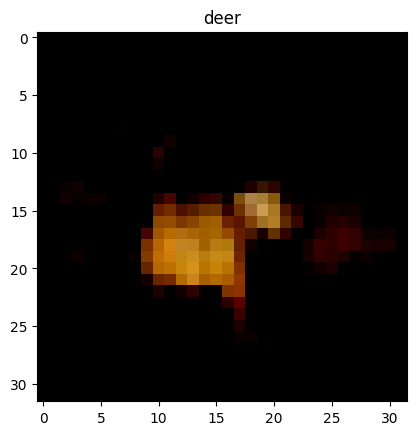

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image 4 shape: torch.Size([32, 32, 3])


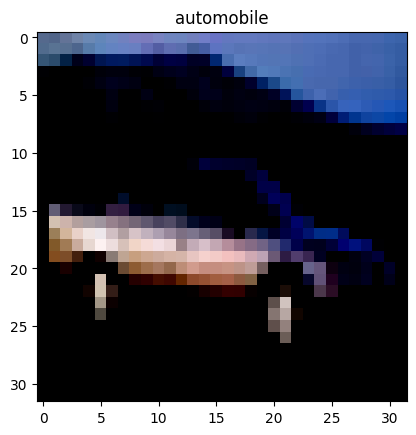

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image 5 shape: torch.Size([32, 32, 3])


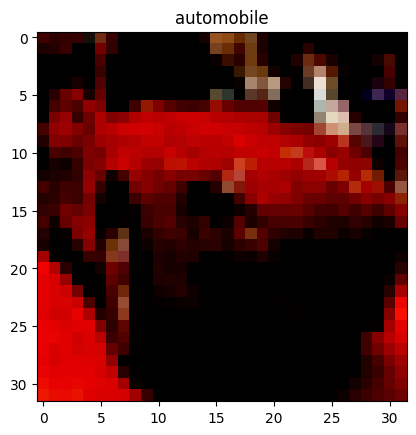

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image 6 shape: torch.Size([32, 32, 3])


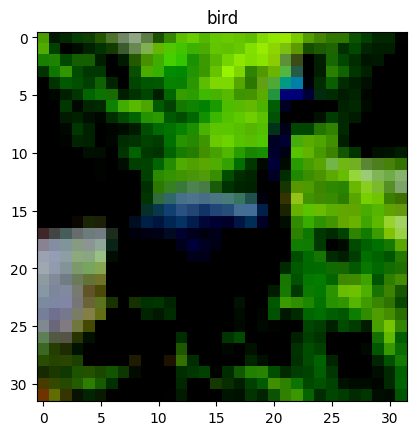

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image 7 shape: torch.Size([32, 32, 3])


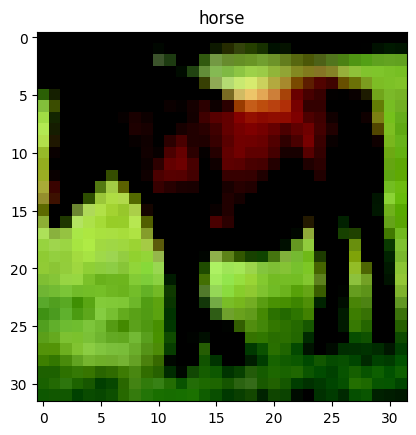

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image 8 shape: torch.Size([32, 32, 3])


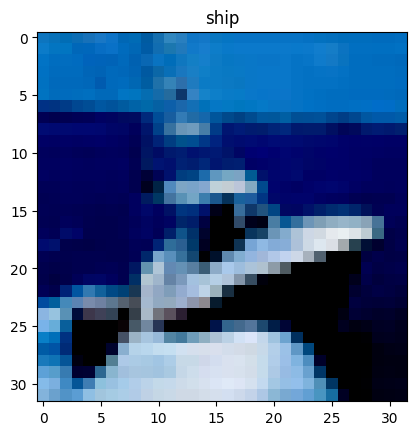

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image 9 shape: torch.Size([32, 32, 3])


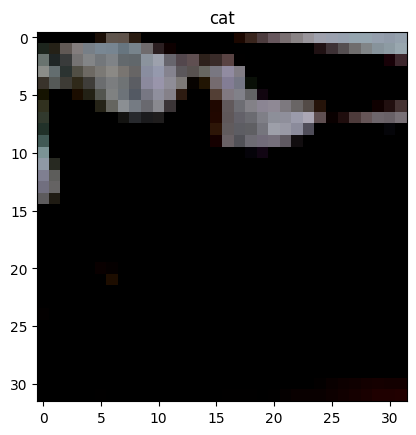

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image 10 shape: torch.Size([32, 32, 3])


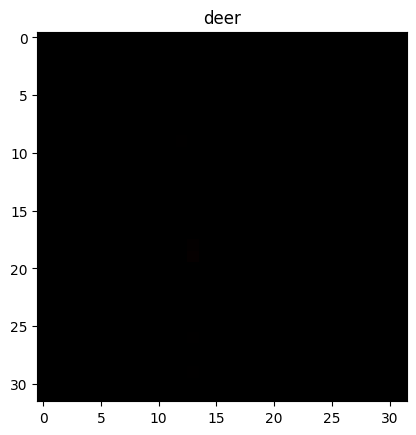

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image 11 shape: torch.Size([32, 32, 3])


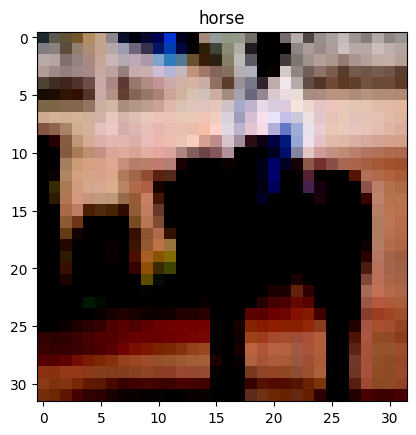

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image 12 shape: torch.Size([32, 32, 3])


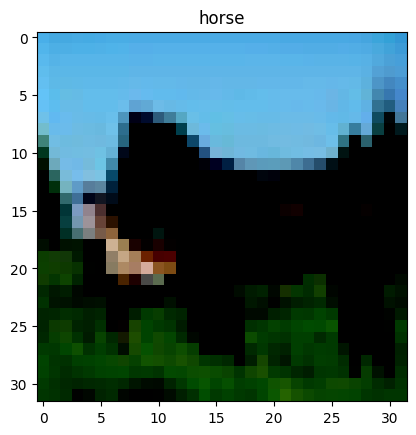

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image 13 shape: torch.Size([32, 32, 3])


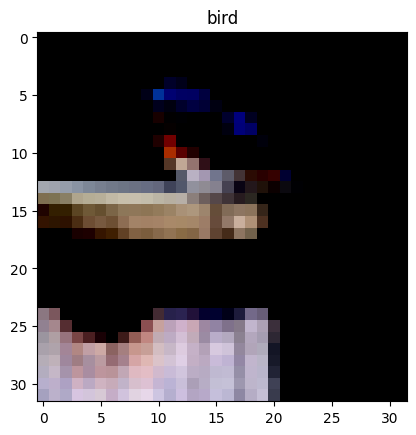

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image 14 shape: torch.Size([32, 32, 3])


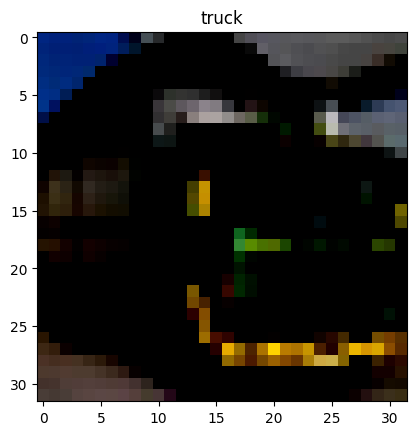

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image 15 shape: torch.Size([32, 32, 3])


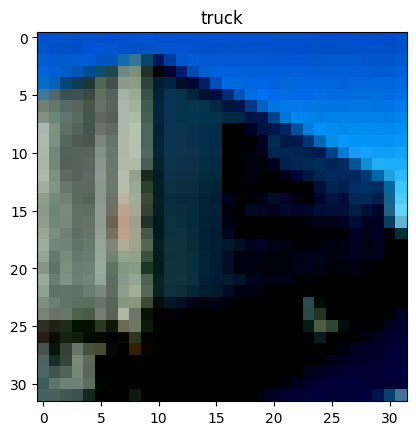

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image 16 shape: torch.Size([32, 32, 3])


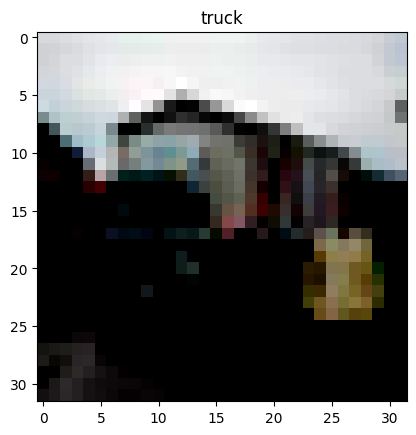

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image 17 shape: torch.Size([32, 32, 3])


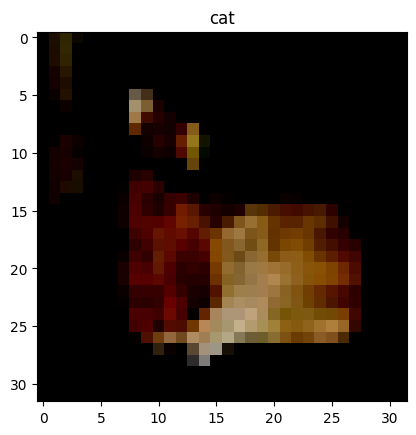

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image 18 shape: torch.Size([32, 32, 3])


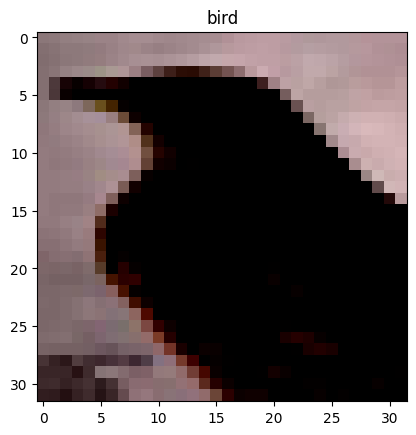

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image 19 shape: torch.Size([32, 32, 3])


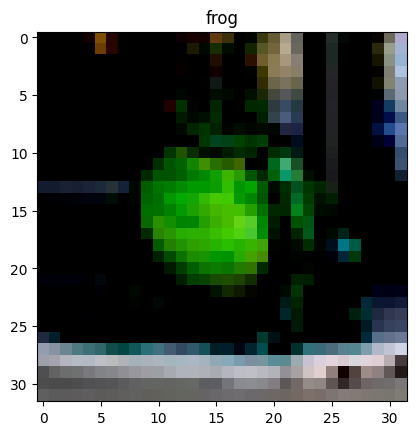

In [169]:
for i in range(20):
    image, label = train[i]
    image = image.permute(1, 2, 0)
    print(f"Image {i} shape: {image.shape}")
    plt.imshow(image, interpolation="nearest")
    plt.title(classes[label])
    plt.show()

In [5]:
BATCH_SIZE = 4

train_dataloader = DataLoader(
    train,
    batch_size=BATCH_SIZE,
    shuffle=True
)

test_dataloader = DataLoader(
    test,
    batch_size=BATCH_SIZE,
    shuffle=False
)

In [6]:
device = torch.device('mps')

def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    return correct / len(y_pred) * 100

def train_model(model, optimizer, loss_fn):
    torch.manual_seed(42)
    epochs = 1#0

    for epoch in tqdm(range(epochs)):
        print(f"[EPOCH {epoch+1}/{epochs}] ", end="")
        train_loss = 0

        for batch, (X, y) in enumerate(train_dataloader):
            X, y = X.to(device), y.to(device)
            model.train()

            y_pred = model(X)

            loss = loss_fn(y_pred, y)
            train_loss += loss

            optimizer.zero_grad()

            loss.backward()

            optimizer.step()

        train_loss /= len(train_dataloader)

        test_loss, test_acc = 0, 0
        model.eval()
        with torch.inference_mode():
            for X, y in test_dataloader:
                X, y = X.to(device), y.to(device)
                test_pred = model(X)

                test_loss += loss_fn(test_pred, y)
                test_acc += accuracy_fn(y, test_pred.argmax (dim=1))

            test_loss /= len(test_dataloader)
            test_acc /= len(test_dataloader)

        print(f"Train loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

In [7]:
# Build the model
model = nn.Sequential(
    nn.Conv2d(3, 6, 5),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),

    nn.Conv2d(6, 16, 5),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),

    nn.Flatten(),

    nn.Linear(16*5*5, 120),
    nn.ReLU(),

    nn.Linear(120, 84),
    nn.ReLU(),

    nn.Linear(84, 10)
).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.001, momentum=0.9)

In [9]:
train_model(model, optimizer, loss_fn)

  0%|          | 0/1 [00:00<?, ?it/s]

[EPOCH 1/1] 

100%|██████████| 1/1 [00:48<00:00, 48.65s/it]

Train loss: 1.52620 | Test loss: 1.34787, Test acc: 51.30%


In [38]:
image, label = train[2]
image = image.view(1, 3, 32, 32)
output = model(image.to(device))
print(classes[torch.argmax(output)])

truck


In [41]:
def visualize_activation_maps(model, image):
    model.eval()   # 1

    activations = {}   # 2
    def get_activation(name):   # 3
        def hook(module, input, output):
            activations[name] = output.detach()
        return hook

    for name, layer in model.named_modules():   # 4
        layer.register_forward_hook(get_activation(name))

    output = model(image)   # 5

    for name, act in activations.items():   # 6
        if len(act.shape) == 3 or len(act.shape) == 4:
            plt.figure()
            plt.title(name)
            plt.imshow(act[0].mean(dim=0).cpu().numpy())
            plt.show()
        else:
            print(f'Cannot create a heatmap for {name}, activation shape: {act.shape}')


In [118]:
layers = list(model.modules())[1:7]
layers = layers + utils.toconv(list(model.modules())[7:])
L = len(layers)

In [119]:
layers

[Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1)),
 ReLU(),
 MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False),
 Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1)),
 ReLU(),
 MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False),
 Flatten(start_dim=1, end_dim=-1),
 Conv2d(400, 120, kernel_size=(1, 1), stride=(1, 1)),
 ReLU(),
 Conv2d(120, 84, kernel_size=(1, 1), stride=(1, 1)),
 ReLU(),
 Conv2d(84, 10, kernel_size=(1, 1), stride=(1, 1))]

In [157]:
img = np.array(train[8][0])
X = (torch.FloatTensor(img[np.newaxis]).to(device) - 0.5)

In [158]:
A = [X]+[None]*L
for l in range(L):
    if isinstance(layers[l], nn.Flatten):
        A[l+1] = layers[l].forward(A[l])
        A[l+1] = A[l+1].reshape([400, 1, 1])
    else:
        A[l+1] = layers[l].forward(A[l])

In [159]:
T = torch.FloatTensor((1.0*(np.arange(10)==6).reshape([1,10,1,1]))).to(device)
R = [None]*L + [(A[-1]*T).data]

In [160]:
scores = np.array(A[-1].cpu().data.view(-1))
ind = np.argsort(-scores)
for i in ind[:10]:
    print('%10s (%d): %6.3f'%(classes[i],i,scores[i]))

      ship (8):  6.186
  airplane (0):  5.103
automobile (1):  2.627
     truck (9):  1.553
      bird (2): -0.355
      deer (4): -0.751
       cat (3): -2.406
      frog (6): -3.293
       dog (5): -3.941
     horse (7): -4.387


In [167]:
for l in range(0,L)[::-1]:
    A[l] = (A[l].data).requires_grad_(True)

    if isinstance(layers[l],torch.nn.Conv2d) or isinstance(layers[l],torch.nn.MaxPool2d):
        
        if l == 0:
            rho = lambda p: p
            incr = lambda z: z+1e-9
        elif l <= 2:       
            rho = lambda p: p + 0.25*p.clamp(min=0)
            incr = lambda z: z+1e-9
        elif 1 <= l <= 5: 
            rho = lambda p: p 
            incr = lambda z: z+1e-9+0.25*((z**2).mean()**.5).data
        elif l >= 6:
            rho = lambda p: p
            incr = lambda z: z+1e-9

        z = incr(utils.newlayer(layers[l],rho).forward(A[l]))
        s = (R[l+1]/z).data
        (z*s).sum().backward()
        c = A[l].grad
        R[l] = (A[l]*c).data

    elif isinstance(layers[l], nn.Flatten):
        R[l] = R[l+1].reshape([1, 16, 5, 5])
        
    else:
        R[l] = R[l+1]

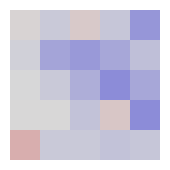

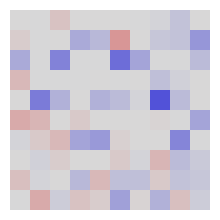

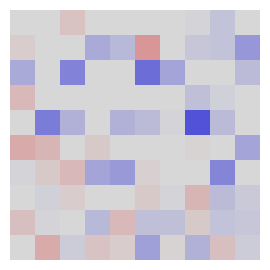

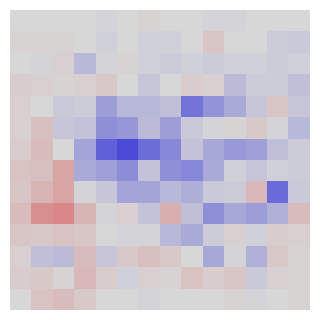

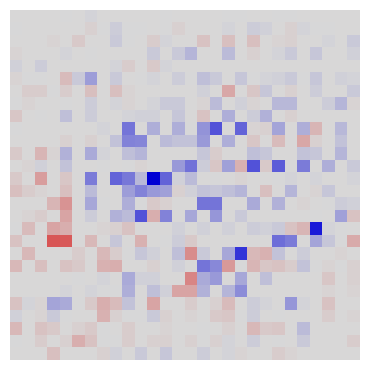

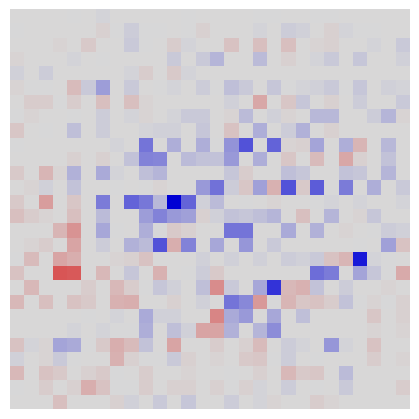

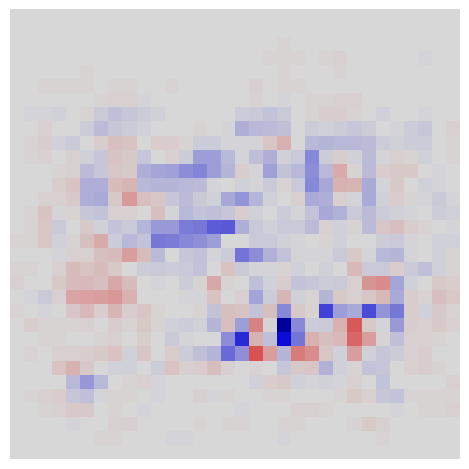

In [168]:
for i,l in enumerate([6, 5, 4, 3, 2, 1, 0]):
    utils.heatmap(np.array(R[l][0].cpu()).sum(axis=0),0.5*i+1.5,0.5*i+1.5)